In [1]:
import os
import sys
import csv
import requests
from bs4 import BeautifulSoup
import json
import datetime
from datetime import date, timedelta
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt


# Pre

In [15]:
df = pd.read_csv('../data/processed_data.csv')

In [16]:
df.shape

(3414, 26)

In [17]:
def RSI(close, period=14):
    delta = close.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi


In [18]:
rsi = RSI(df['btc_price'])

In [19]:
df['btc_rsi'] = rsi

In [20]:
df.tail()

,Date,btc_price,btc_open,btc_high,btc_low,btc_change,gold_price,gold_open,gold_high,gold_low,...,us30_open,us30_high,us30_low,us30_change,usidx_price,usidx_open,usidx_high,usidx_low,usidx_change,btc_rsi
3409,2024-05-03,62978.0,59247.0,63429.0,58914.0,6.30,2308.6,2313.5,2330.70,2285.2,...,38457.4,38804.0,38423.1,0.65,104.960,105.180,105.250,104.410,-0.21,47.527671
3410,2024-05-04,63983.0,62978.0,64644.0,62690.0,1.60,2308.6,2313.5,2330.70,2285.2,...,38457.4,38804.0,38423.1,0.65,104.960,105.180,105.250,104.410,-0.21,47.017859
3411,2024-05-05,64173.0,63983.0,64769.0,63034.0,0.30,2308.6,2313.5,2330.70,2285.2,...,38757.5,38765.0,38717.5,0.06,105.060,104.940,105.065,104.940,0.10,47.717773
3412,2024-05-06,63280.0,64173.0,65625.0,62812.0,-1.39,2331.2,2312.8,2341.90,2300.6,...,38722.5,38880.0,38689.3,0.30,104.960,105.065,105.080,104.745,-0.10,39.329160
3413,2024-05-07,63753.0,63280.0,64480.0,62987.0,0.75,2327.6,2334.6,2338.65,2318.3,...,38847.9,38945.4,38838.5,0.16,104.955,105.020,105.180,104.915,-0.00,42.030523


In [21]:
df['btc_next'] = df['btc_open'].shift(-1)

In [22]:
df = df.drop(3413)

In [23]:
df = df.fillna(method='bfill')

In [24]:
df.tail()

,Date,btc_price,btc_open,btc_high,btc_low,btc_change,gold_price,gold_open,gold_high,gold_low,...,us30_high,us30_low,us30_change,usidx_price,usidx_open,usidx_high,usidx_low,usidx_change,btc_rsi,btc_next
3408,2024-05-02,59247.0,58457.0,59732.0,57082.0,1.35,2309.6,2329.9,2336.1,2294.3,...,38531.7,37879.2,1.17,105.178,105.590,105.785,105.170,-0.43,35.321541,59247.0
3409,2024-05-03,62978.0,59247.0,63429.0,58914.0,6.30,2308.6,2313.5,2330.7,2285.2,...,38804.0,38423.1,0.65,104.960,105.180,105.250,104.410,-0.21,47.527671,62978.0
3410,2024-05-04,63983.0,62978.0,64644.0,62690.0,1.60,2308.6,2313.5,2330.7,2285.2,...,38804.0,38423.1,0.65,104.960,105.180,105.250,104.410,-0.21,47.017859,63983.0
3411,2024-05-05,64173.0,63983.0,64769.0,63034.0,0.30,2308.6,2313.5,2330.7,2285.2,...,38765.0,38717.5,0.06,105.060,104.940,105.065,104.940,0.10,47.717773,64173.0
3412,2024-05-06,63280.0,64173.0,65625.0,62812.0,-1.39,2331.2,2312.8,2341.9,2300.6,...,38880.0,38689.3,0.30,104.960,105.065,105.080,104.745,-0.10,39.329160,63280.0


In [25]:
df.isna().sum()

Date            0
btc_price       0
btc_open        0
btc_high        0
btc_low         0
btc_change      0
gold_price      0
gold_open       0
gold_high       0
gold_low        0
gold_change     0
sp_price        0
sp_open         0
sp_high         0
sp_low          0
sp_change       0
us30_price      0
us30_open       0
us30_high       0
us30_low        0
us30_change     0
usidx_price     0
usidx_open      0
usidx_high      0
usidx_low       0
usidx_change    0
btc_rsi         0
btc_next        0
dtype: int64

In [26]:
df['direction'] = df.apply(lambda row: 1 if row['btc_next'] - row['btc_open'] > 0 else 0, axis=1)


In [27]:
df.head()

,Date,btc_price,btc_open,btc_high,btc_low,btc_change,gold_price,gold_open,gold_high,gold_low,...,us30_low,us30_change,usidx_price,usidx_open,usidx_high,usidx_low,usidx_change,btc_rsi,btc_next,direction
0,2015-01-01,313.9,317.5,317.5,312.9,-0.99,1186.2,1184.0,1194.9,1167.3,...,17757.0,-0.01,91.383,90.81,91.49,90.80,0.81,21.173357,313.6,0
1,2015-01-02,315.1,313.6,316.0,313.0,0.40,1186.2,1184.0,1194.9,1167.3,...,17731.3,0.06,91.383,90.81,91.49,90.80,0.81,21.173357,314.8,1
2,2015-01-03,282.0,314.8,314.8,282.0,-10.51,1186.2,1184.0,1194.9,1167.3,...,17731.3,0.06,91.383,90.81,91.49,90.80,0.81,21.173357,282.0,0
3,2015-01-04,258.8,282.0,288.9,258.8,-8.23,1186.2,1184.0,1194.9,1167.3,...,17731.3,0.06,91.383,90.81,91.49,90.80,0.81,21.173357,261.0,0
4,2015-01-05,273.2,261.0,276.5,260.5,5.57,1204.0,1187.8,1207.5,1177.8,...,17475.9,-1.86,91.622,91.73,92.05,91.55,0.26,21.173357,273.2,1


In [28]:
df = df.drop(columns='btc_next')

In [29]:
df.head()

,Date,btc_price,btc_open,btc_high,btc_low,btc_change,gold_price,gold_open,gold_high,gold_low,...,us30_high,us30_low,us30_change,usidx_price,usidx_open,usidx_high,usidx_low,usidx_change,btc_rsi,direction
0,2015-01-01,313.9,317.5,317.5,312.9,-0.99,1186.2,1184.0,1194.9,1167.3,...,17825.5,17757.0,-0.01,91.383,90.81,91.49,90.80,0.81,21.173357,0
1,2015-01-02,315.1,313.6,316.0,313.0,0.40,1186.2,1184.0,1194.9,1167.3,...,17951.8,17731.3,0.06,91.383,90.81,91.49,90.80,0.81,21.173357,1
2,2015-01-03,282.0,314.8,314.8,282.0,-10.51,1186.2,1184.0,1194.9,1167.3,...,17951.8,17731.3,0.06,91.383,90.81,91.49,90.80,0.81,21.173357,0
3,2015-01-04,258.8,282.0,288.9,258.8,-8.23,1186.2,1184.0,1194.9,1167.3,...,17951.8,17731.3,0.06,91.383,90.81,91.49,90.80,0.81,21.173357,0
4,2015-01-05,273.2,261.0,276.5,260.5,5.57,1204.0,1187.8,1207.5,1177.8,...,17821.3,17475.9,-1.86,91.622,91.73,92.05,91.55,0.26,21.173357,1


In [30]:
df.set_index('Date', inplace=True)

In [31]:
df.head()

,btc_price,btc_open,btc_high,btc_low,btc_change,gold_price,gold_open,gold_high,gold_low,gold_change,...,us30_high,us30_low,us30_change,usidx_price,usidx_open,usidx_high,usidx_low,usidx_change,btc_rsi,direction
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,313.9,317.5,317.5,312.9,-0.99,1186.2,1184.0,1194.9,1167.3,0.18,...,17825.5,17757.0,-0.01,91.383,90.81,91.49,90.80,0.81,21.173357,0
2015-01-02,315.1,313.6,316.0,313.0,0.40,1186.2,1184.0,1194.9,1167.3,0.18,...,17951.8,17731.3,0.06,91.383,90.81,91.49,90.80,0.81,21.173357,1
2015-01-03,282.0,314.8,314.8,282.0,-10.51,1186.2,1184.0,1194.9,1167.3,0.18,...,17951.8,17731.3,0.06,91.383,90.81,91.49,90.80,0.81,21.173357,0
2015-01-04,258.8,282.0,288.9,258.8,-8.23,1186.2,1184.0,1194.9,1167.3,0.18,...,17951.8,17731.3,0.06,91.383,90.81,91.49,90.80,0.81,21.173357,0
2015-01-05,273.2,261.0,276.5,260.5,5.57,1204.0,1187.8,1207.5,1177.8,1.50,...,17821.3,17475.9,-1.86,91.622,91.73,92.05,91.55,0.26,21.173357,1


In [32]:
df.to_csv('../data/processed_datav2.csv', index=True)

# Graphical comparison

In [153]:
df = pd.read_csv('../data/processed_datav2.csv')

In [154]:
df.set_index('Date', inplace=True)

In [155]:
dft=df.tail(60)

In [36]:
column_list = df.columns.tolist()
print(column_list)

['btc_price', 'btc_open', 'btc_high', 'btc_low', 'btc_change', 'gold_price', 'gold_open', 'gold_high', 'gold_low', 'gold_change', 'sp_price', 'sp_open', 'sp_high', 'sp_low', 'sp_change', 'us30_price', 'us30_open', 'us30_high', 'us30_low', 'us30_change', 'usidx_price', 'usidx_open', 'usidx_high', 'usidx_low', 'usidx_change', 'btc_rsi', 'direction']


In [82]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=dft.index, y=dft['btc_price'], name='Bitcoin Price', mode='lines', line=dict(shape='spline',smoothing=1, color='green')))
fig.update_traces(hoverinfo='x+y', hoverlabel=dict(bgcolor='green', bordercolor='white', font=dict(size=12)))
fig.update_layout(
    
    xaxis=dict(title='Date', type='date'),
    
    plot_bgcolor='white',
    hovermode='x'
    
    
)
fig.add_trace(go.Scatter(x=dft.index, y=dft['btc_rsi'], name='RSI', mode='lines', line=dict(shape='spline', smoothing=1, color='red', width=1), 
                         yaxis='y2', opacity=0.3 ))
fig.update_layout(yaxis2=dict( overlaying='y', side='right', range=[0, 100]))

# Display the Plotly chart


fig.show()

In [168]:
#from plotly import data
fig2 = go.Figure(layout=dict(barcornerradius=50))

# Add percentage change chart
fig2.add_trace(go.Bar(
    x=dft.index,
    y=dft['btc_change'].apply(lambda x: x if x > 0 else 0),
    showlegend=False,
    marker_color='green',
    hoverinfo='x+y',
    
))

# Add bars for negative changes
fig2.add_trace(go.Bar(
    x=dft.index,
    y=dft['btc_change'].apply(lambda x: x if x < 0 else 0),
    showlegend=False,
    marker_color='red',
    hoverinfo='x+y'
))

# Update layout
fig2.update_layout(
    xaxis=dict(type='date'),
    yaxis=dict(title='Price Change (%)'),
    plot_bgcolor='white',
    hovermode='x',
    barmode='relative',  
    showlegend=False
)



In [111]:
import plotly.graph_objects as go
from plotly import data

df = data.medals_wide()

fig = go.Figure(
    data=[
        go.Bar(x=df.nation, y=df.gold, name="Gold"),
        go.Bar(x=df.nation, y=df.silver, name="Silver"),
        go.Bar(x=df.nation, y=df.bronze, name="Bronze"),
    ],
    layout=dict(barcornerradius=15),
)

fig.show()

In [36]:
df['Date'] = pd.to_datetime(df['Date'])

# Calculate average price
average_price = df['btc_price'].mean()

# Create separate traces for above-average and below-average prices
above_avg_trace = go.Scatter(
    x=df[df['btc_price'] >= average_price]['Date'],
    y=df[df['btc_price'] >= average_price]['btc_price'],
    mode='lines+markers',
    name='Above Average',
    line=dict(color='green')
)

below_avg_trace = go.Scatter(
    x=df[df['btc_price'] < average_price]['Date'],
    y=df[df['btc_price'] < average_price]['btc_price'],
    mode='lines+markers',
    name='Below Average',
    line=dict(color='red')
)

# Create a Plotly figure
fig = go.Figure([above_avg_trace, below_avg_trace])
fig.update_layout(
    title='Bitcoin Price Over Time',
    xaxis=dict(title='Date', type='date'),
    yaxis=dict(title='Bitcoin Price'),
    showlegend=True,  # Show legend
    plot_bgcolor='white',  # Set background color to white
    hovermode='y'  # Show y-axis grid lines on hover
)

# Display the Plotly chart without control panel and Plotly-like elements
fig.show(config={'displayModeBar': False})

In [37]:


fig = go.Figure()

fig.add_trace(go.Scatter(x=df.index, y=df['btc_price'], name='Bitcoin Price', line=dict(color='green')))

fig.add_trace(go.Scatter(x=df.index, y=df['gold_price'], name='Gold Price', line=dict(color='orange'), yaxis='y2'))

fig.update_layout(
    title='Bitcoin Price and Gold Price Over Time',
    xaxis=dict(title='Date', type='date'),
    yaxis=dict(title='Bitcoin Price'),
    yaxis2=dict(title='Gold Price', overlaying='y', side='right', showgrid=False)
)


fig.show()


In [38]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df.index, y=df['btc_price'], name='Bitcoin Price', line=dict(color='green')))

fig.add_trace(go.Scatter(x=df.index, y=df['sp_price'], name='S&P Price', line=dict(color='grey'), yaxis='y2'))

fig.update_layout(
    title='Bitcoin Price and S&P Over Time',
    xaxis=dict(title='Date', type='date'),
    yaxis=dict(title='Bitcoin Price'),
    yaxis2=dict(title='S&P Price', overlaying='y', side='right', showgrid=False)
)


fig.show()

In [39]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df.index, y=df['btc_price'], name='Bitcoin Price', line=dict(color='green')))

fig.add_trace(go.Scatter(x=df.index, y=df['us30_price'], name='US30 Price', line=dict(color='blue'), yaxis='y2'))

fig.update_layout(
    title='Bitcoin Price and US30 Price Over Time',
    xaxis=dict(title='Date', type='date'),
    yaxis=dict(title='Bitcoin Price'),
    yaxis2=dict(title='US30 Price', overlaying='y', side='right', showgrid=False)
)


fig.show()

In [40]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df.index, y=df['btc_price'], name='Bitcoin Price', line=dict(color='green')))

fig.add_trace(go.Scatter(x=df.index, y=df['usidx_price'], name='Dollar Index Price', line=dict(color='brown'), yaxis='y2'))

fig.update_layout(
    title='Bitcoin Price and Dollar Index Over Time',
    xaxis=dict(title='Date', type='date'),
    yaxis=dict(title='Bitcoin Price'),
    yaxis2=dict(title='Dollar Index Price', overlaying='y', side='right', showgrid=False)
)


fig.show()

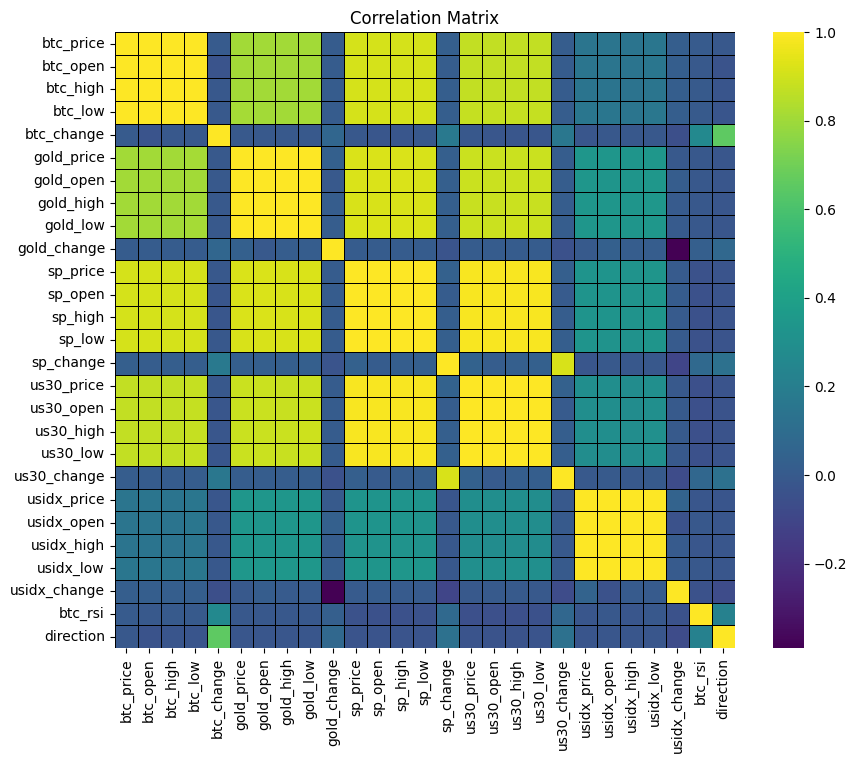

In [41]:
corr = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='viridis', linewidths=0.5, linecolor='black')
plt.title('Correlation Matrix')
plt.show()